Self-driving cars have revolutionized transportation, offering passengers the ability to travel without active driving. However, achieving Level 5 autonomy, where vehicles can operate independently in all scenarios, requires a deep understanding of and adherence to traffic rules.

In the realm of Artificial Intelligence and advanced technologies, leading companies like Tesla, Uber, Google, Mercedes-Benz, Toyota, Ford, and Audi are at the forefront of developing autonomous vehicles. To ensure the highest accuracy and reliability in these systems, self-driving cars must effectively interpret traffic signs and make informed, real-time decisions. This capability is critical for ensuring safety and efficiency on the roads.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

### **Exploring the dataset**

In [2]:
data = []
labels = []
classes = 43
data_path = "dataset"

In [3]:
for i in range(classes):
    path = os.path.join(data_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '//' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error Loading Image')

data = np.array(data)
labels = np.array(labels)

We have stored all the images and their labels into lists (data and labels).

To feed the data into the model, first, we convert the list of images into a NumPy array. The dataset has dimensions `(39209, 30, 30, 3)`, where:

- 39209 is the number of images,
- 30×30 represents the pixel resolution of each image, and
- 3 denotes the RGB color channels.

We use the `train_test_split()` function from the `sklearn` library to divide the dataset into training and testing subsets.

This process ensures the model is trained on one portion of the data and evaluated on another to measure its performance.

In [4]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

### **Building a CNN model**

In [8]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

e:\Data Science & AI\Resume Projects\Traffic Sign Recognition\traffic_sign_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

### **Train and validate the model**

In [12]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data = (X_test, y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2591 - loss: 3.4551 - val_accuracy: 0.7782 - val_loss: 0.7498
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6751 - loss: 1.1024 - val_accuracy: 0.8893 - val_loss: 0.3994
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7915 - loss: 0.7025 - val_accuracy: 0.9478 - val_loss: 0.1901
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8671 - loss: 0.4475 - val_accuracy: 0.9634 - val_loss: 0.1291
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9054 - loss: 0.3223 - val_accuracy: 0.9716 - val_loss: 0.1019
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9183 - loss: 0.3009 - val_accuracy: 0.9730 - val_loss: 0.0914
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9285 - loss: 0.2504 - val_accuracy: 0.9802 - val_loss: 0.0724
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9293 - loss: 0.2540 - 

We got a 94% accuracy on the training data.

Plotting the graph for accuracy and loss

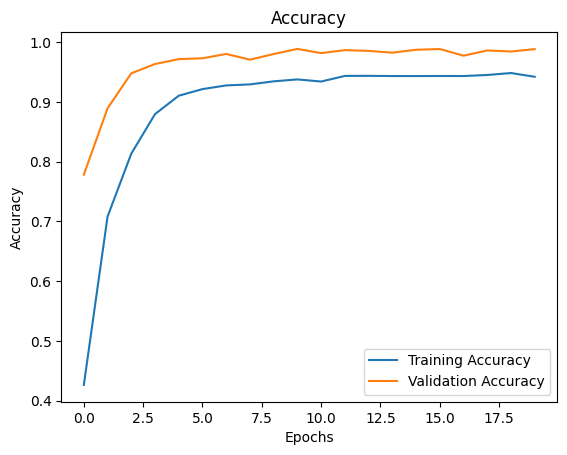

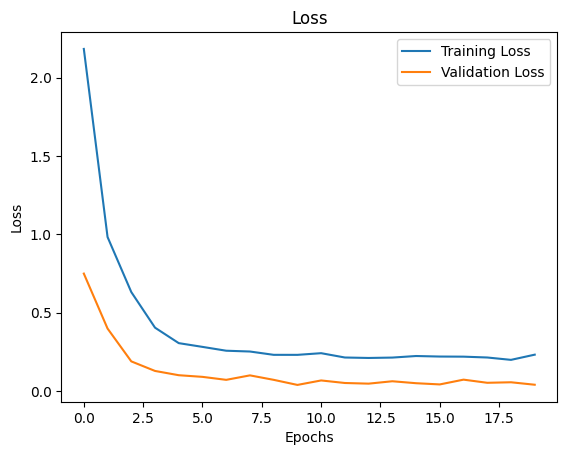

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='Training Loss')    
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### **Tesing the model**

We have the dataset that includes a `test` folder, and a `test.csv` file containing the image paths and their corresponding class labels. Using pandas, we extract the image paths and labels. To prepare the images for model prediction, we resize each image to 30×30 pixels. We then create a numpy array that holds all the image data. After making predictions with our model, we use `accuracy_score` from `sklearn.metrics` to compare the predicted labels with the actual labels. This approach resulted in achieving 95% accuracy in our model's performance.

In [ ]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('dataset/Test.csv')

labels = y_test['ClassId'].values
imgs = y_test['Path'].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis=1)

print(accuracy_score(labels, predictions))

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
0.9541567695961995


### Save the model

In [18]:
model.save('traffic_sign_detector.h5')